## CSCI 6330
### Project Code

### Wind Farms Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install -qq gdown==4.6.0 torchinfo

In [ ]:
# !gdown "1UgYiB00Pg5pk1bdexFiFnLrhFC5LeKKx"


Downloading...
From: https://drive.google.com/uc?id=1UgYiB00Pg5pk1bdexFiFnLrhFC5LeKKx
To: /content/GEF2012-wind-forecasting.zip
100% 8.36M/8.36M [00:00<00:00, 80.7MB/s]


In [ ]:
# !rm -rf "wind_data"
# !mkdir "wind_data"
# !unzip -oj "/content/GEF2012-wind-forecasting" -d "wind_data"

Archive:  /content/GEF2012-wind-forecasting.zip
  inflating: wind_data/._GEF2012-wind-forecasting  
  inflating: wind_data/windforecasts_wf2.csv  
  inflating: wind_data/._windforecasts_wf2.csv  
  inflating: wind_data/windforecasts_wf3.csv  
  inflating: wind_data/._windforecasts_wf3.csv  
  inflating: wind_data/test.csv      
  inflating: wind_data/._test.csv    
  inflating: wind_data/windforecasts_wf1.csv  
  inflating: wind_data/._windforecasts_wf1.csv  
  inflating: wind_data/benchmark.csv  
  inflating: wind_data/._benchmark.csv  
  inflating: wind_data/windforecasts_wf4.csv  
  inflating: wind_data/._windforecasts_wf4.csv  
  inflating: wind_data/windforecasts_wf5.csv  
  inflating: wind_data/._windforecasts_wf5.csv  
  inflating: wind_data/windforecasts_wf7.csv  
  inflating: wind_data/._windforecasts_wf7.csv  
  inflating: wind_data/windforecasts_wf6.csv  
  inflating: wind_data/._windforecasts_wf6.csv  
  inflating: wind_data/train.csv     
  inflating: wind_data/._train.csv

### s&p500 Data

In [ ]:
!gdown "1Yx1RLtbIEyxImj0D4J20OpzIS-ItzWL7"

Downloading...
From (original): https://drive.google.com/uc?id=1Yx1RLtbIEyxImj0D4J20OpzIS-ItzWL7
From (redirected): https://drive.google.com/uc?id=1Yx1RLtbIEyxImj0D4J20OpzIS-ItzWL7&confirm=t&uuid=d2b6c10b-4529-42a1-a909-efb0bfe07e8e
To: /content/s&p500.zip
100% 45.8M/45.8M [00:00<00:00, 88.3MB/s]


In [ ]:
!rm -rf "s&p500"
!mkdir "s&p500"
!unzip -oj "/content/s&p500.zip" -d "s&p500"

Archive:  /content/s&p500.zip
  inflating: s&p500/._s&p500         
  inflating: s&p500/sp500_stocks.csv  
  inflating: s&p500/._sp500_stocks.csv  
  inflating: s&p500/sp500_companies.csv  
  inflating: s&p500/._sp500_companies.csv  
  inflating: s&p500/sp500_index.csv  
  inflating: s&p500/._sp500_index.csv  


In [ ]:
!pip install yfinance --upgrade
!pip install pandas_datareader --upgrade

In [ ]:
!pip install pandas yfinance matplotlib tensorflow scikit-learn

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import datetime

In [ ]:
df = pd.read_csv('/content/s&p500_Small.csv')

# Inspect the data
df.head()


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,1/4/10,MMM,44.016735,69.414719,69.774246,69.122070,69.473244,3640265
1,1/5/10,MMM,43.741039,68.979935,69.590302,68.311035,69.230766,3405012
2,1/6/10,MMM,44.361347,69.958191,70.735786,69.824417,70.133781,6301126
3,1/7/10,MMM,44.393166,70.008362,70.033447,68.662209,69.665550,5346240
4,1/8/10,MMM,44.705963,70.501671,70.501671,69.648827,69.974915,4073337


In [ ]:
# print(df.columns)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-7-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df = df.sort_values('Date')

In [ ]:
print(df.head())

           Date Symbol  Adj Close      Close       High        Low       Open  \
0    2010-01-04    MMM  44.016735  69.414719  69.774246  69.122070  69.473244   
3696 2010-01-04    AOS   5.963979   7.435000   7.480000   7.261667   7.295000   
1    2010-01-05    MMM  43.741039  68.979935  69.590302  68.311035  69.230766   
3697 2010-01-05    AOS   5.887777   7.340000   7.431667   7.308333   7.431667   
2    2010-01-06    MMM  44.361347  69.958191  70.735786  69.824417  70.133781   

       Volume  
0     3640265  
3696  1104600  
1     3405012  
3697  1207200  
2     6301126  


In [ ]:
scaler = MinMaxScaler()
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df.head())

           Date Symbol  Adj Close     Close      High       Low      Open  \
0    2010-01-04    MMM   0.237605  0.298586  0.298419  0.300587  0.298998   
3696 2010-01-04    AOS   0.002444  0.002508  0.001967  0.001995  0.001824   
1    2010-01-05    MMM   0.235901  0.296509  0.297544  0.296673  0.297839   
3697 2010-01-05    AOS   0.001973  0.002054  0.001737  0.002220  0.002477   
2    2010-01-06    MMM   0.239735  0.301182  0.302995  0.303978  0.302155   

        Volume  
0     0.056586  
3696  0.014468  
1     0.052679  
3697  0.016172  
2     0.100784  


In [ ]:
time_step_predict = 15 #for 15 day ahead prediction
X= []
y=[]
for i in range(len(df) - time_step_predict):
  X.append(df[columns_to_scale].iloc[i:i + time_step_predict].values)
  y.append(df['Close'].iloc[i+time_step_predict])

X = np.array(X)
y = np.array(y)

print("Input Shape:", X.shape)
print("Output Shape:", y.shape)

Input Shape: (5284, 15, 6)
Output Shape: (5284,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)
print("Training Shape:",X_train.shape, X_test.shape)
print("Testing Shape:",y_train.shape, y_test.shape)


Training Shape: (4227, 15, 6) (1057, 15, 6)
Testing Shape: (4227,) (1057,)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='sgd', loss='root_mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 15, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0533 - val_loss: 0.0044
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0291 - val_loss: 9.4377e-04
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0285 - val_loss: 0.0015
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0266 - val_loss: 0.0016
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0234 - val_loss: 0.0038
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0199 - val_loss: 9.8856e-04
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0184 - val_loss: 0.0022
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0179 - val_loss: 0.0025
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0181 - val_loss: 0.0038
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0178 - val_loss: 0.0016
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0179 - val_loss: 0.0025
Epoch 12/50
133/133 ━━━━━━━━━━━━━

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


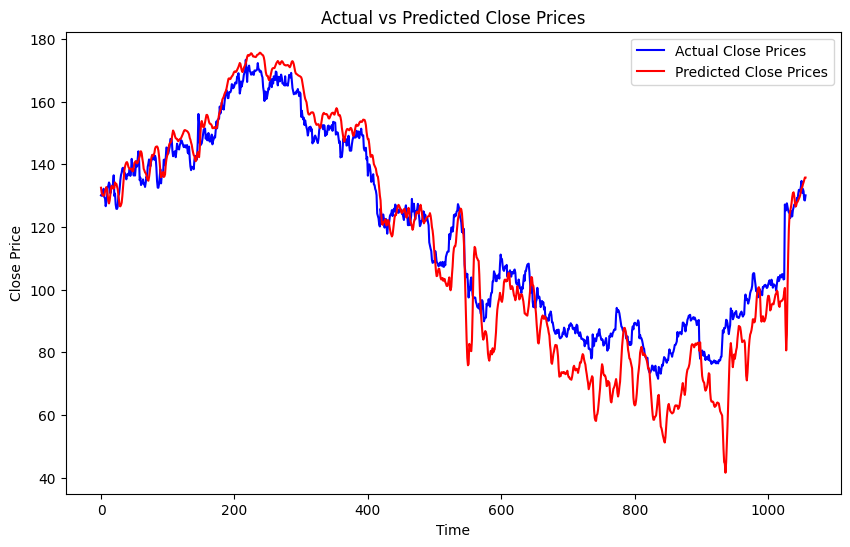

In [ ]:

predicted_close = model.predict(X_test)

predicted_prices = np.zeros((len(predicted_close), X_train.shape[2]))

predicted_prices[:, 3] = predicted_close[:, 0]

predicted_close = scaler.inverse_transform(predicted_prices)[:, 3]

y_test_extended = np.zeros((len(y_test), X_train.shape[2]))

y_test_extended[:, 3] = y_test[:, 0]

y_test_original = scaler.inverse_transform(y_test_extended)[:, 3]

plt.figure(figsize=(10,6))
plt.plot(y_test_original, color='blue', label='Actual Close Prices')
plt.plot(predicted_close, color='red', label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='sgd', loss='root_mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 15, 50)              │           8,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,051 (93.95 KB)

 Trainable params: 24,051 (93.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0842 - val_loss: 0.0035
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0277 - val_loss: 0.0016
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0210 - val_loss: 0.0012
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0203 - val_loss: 0.0025
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - val_loss: 0.0077
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - val_loss: 0.0048
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0174 - val_loss: 0.0083
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0192 - val_loss: 0.0045
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - val_loss: 0.0058
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0162 - val_loss: 0.0165
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0174 - val_loss: 0.0061
Epoch 12/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


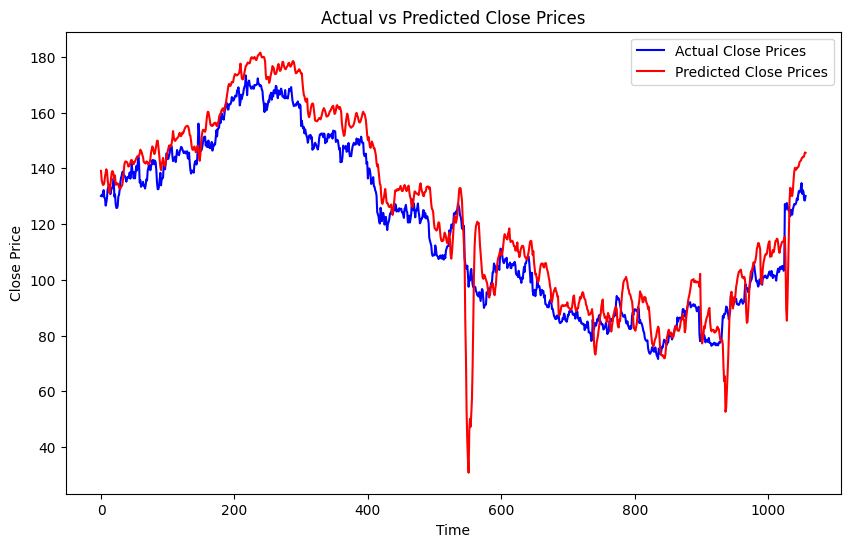

In [ ]:

predicted_close = model.predict(X_test)

predicted_prices = np.zeros((len(predicted_close), X_train.shape[2]))

predicted_prices[:, 3] = predicted_close[:, 0]

predicted_close = scaler.inverse_transform(predicted_prices)[:, 3]

y_test_extended = np.zeros((len(y_test), X_train.shape[2]))

y_test_extended[:, 3] = y_test[:, 0]

y_test_original = scaler.inverse_transform(y_test_extended)[:, 3]

plt.figure(figsize=(10,6))
plt.plot(y_test_original, color='blue', label='Actual Close Prices')
plt.plot(predicted_close, color='red', label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Hybrid Model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='sgd', loss='root_mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 15, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 15, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_9 (GRU)                          │ (None, 15, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,151 (262.31 KB)

 Trainable params: 67,151 (262.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.0501 - val_loss: 6.1081e-04
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0301 - val_loss: 8.0058e-04
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0291 - val_loss: 5.7805e-04
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0301 - val_loss: 0.0039
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0300 - val_loss: 0.0019
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0294 - val_loss: 0.0010
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0296 - val_loss: 0.0029
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0290 - val_loss: 6.6669e-04
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0280 - val_loss: 0.0018
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0285 - val_loss: 7.7578e-04
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0276 - val_loss: 0.0029
Epoch 12/50
133/133

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


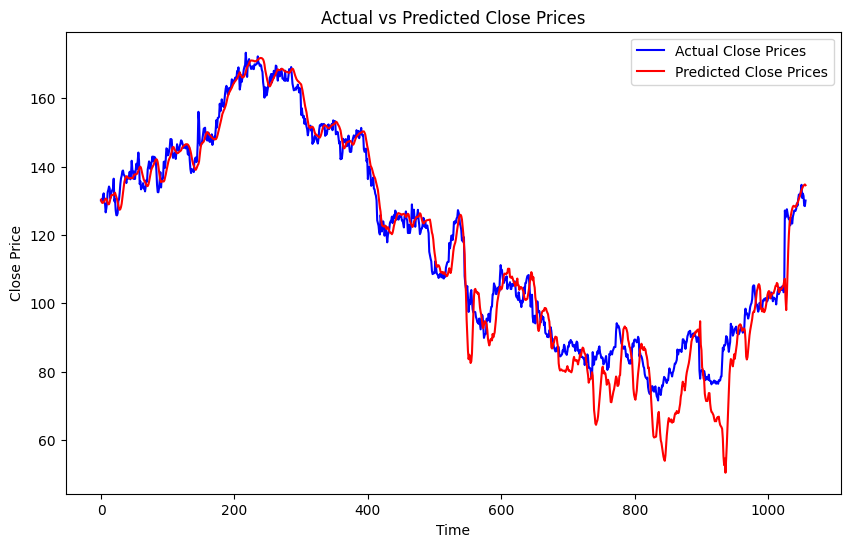

In [ ]:

predicted_close = model.predict(X_test)

predicted_prices = np.zeros((len(predicted_close), X_train.shape[2]))

predicted_prices[:, 3] = predicted_close[:, 0]

predicted_close = scaler.inverse_transform(predicted_prices)[:, 3]

y_test_extended = np.zeros((len(y_test), X_train.shape[2]))

y_test_extended[:, 3] = y_test[:, 0]

y_test_original = scaler.inverse_transform(y_test_extended)[:, 3]

plt.figure(figsize=(10,6))
plt.plot(y_test_original, color='blue', label='Actual Close Prices')
plt.plot(predicted_close, color='red', label='Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## mpi4py

In [ ]:
pip install mpi4py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.2/466.2 kB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-4.0.1-cp310-cp310-linux_x86_64.whl size=4266342 sha256=295fc375b93c2ab058573f33204a4b5a5afbb41e671cf4cf8165bbe110c95368
  Stored in directory: /root/.cache/pip/wheels/3c/ca/13/13218a83854023ccec184e3af482f0f038b434aa32c19afee8
Successfully built mpi4py


In [ ]:
from mpi4py import MPI
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import matplotlib.pyplot as plt

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

def split_data(data, labels, rank, size):
    chunk_size = len(data) // size
    start = rank * chunk_size
    end = (rank + 1) * chunk_size if rank != size - 1 else len(data)
    return data[start:end], labels[start:end]


In [ ]:
X_train_split, y_train_split = split_data(X_train, y_train, rank, size)
X_test_split, y_test_split = split_data(X_test, y_test, rank, size)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='sgd', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train_split, y_train_split, epochs=50, batch_size=32, validation_data=(X_test_split, y_test_split))


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0856 - val_loss: 0.0181
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0473 - val_loss: 0.0084
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0345 - val_loss: 0.0020
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0305 - val_loss: 0.0024
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0298 - val_loss: 0.0033
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0293 - val_loss: 0.0039
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0293 - val_loss: 0.0046
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0293 - val_loss: 0.0016
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0290 - val_loss: 9.3641e-04
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0292 - val_loss: 0.0027
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0293 - val_loss: 8.9813e-04
Epoch 12/50
133/133 ━━━━━━━━━━━━

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


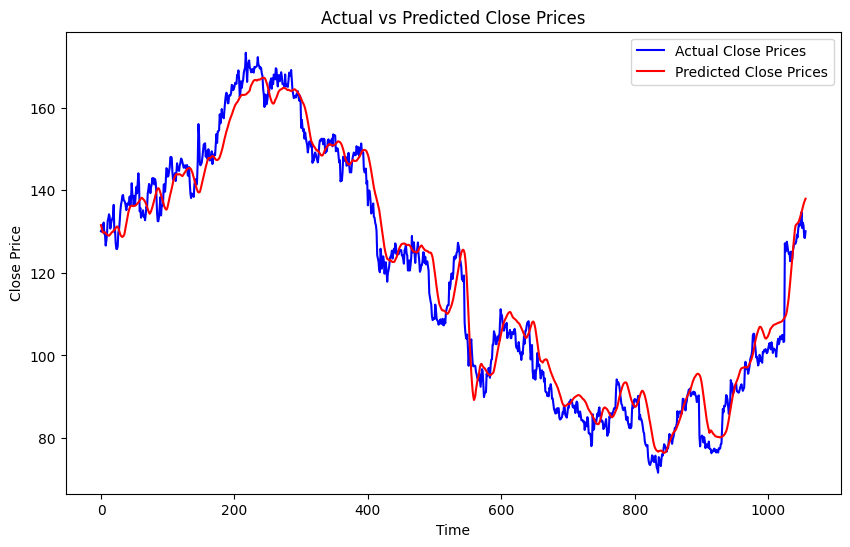

In [ ]:
def aggregate_weights(model, comm, rank, size):
    local_weights = model.get_weights()

    global_weights = [np.zeros_like(w) for w in local_weights]

    for i in range(len(local_weights)):
        comm.Allreduce(local_weights[i], global_weights[i], op=MPI.SUM)

    averaged_weights = [w / size for w in global_weights]

    model.set_weights(averaged_weights)

aggregate_weights(model, comm, rank, size)

if rank == 0:
    predicted_close_all = model.predict(X_test)

    predicted_prices = np.zeros((len(predicted_close_all), X_train.shape[2]))
    predicted_prices[:, 3] = predicted_close_all[:, 0]
    predicted_close = scaler.inverse_transform(predicted_prices)[:, 3]

    y_test_extended = np.zeros((len(y_test), X_train.shape[2]))
    y_test_extended[:, 3] = y_test
    y_test_original = scaler.inverse_transform(y_test_extended)[:, 3]

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_original, color='blue', label='Actual Close Prices')
    plt.plot(predicted_close, color='red', label='Predicted Close Prices')
    plt.title('Actual vs Predicted Close Prices')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()